In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks

# Calibracion

## Toma de datos para el ajuste

In [ ]:
vpp_gen = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
vpp_ = np.array([1.04, 2.04, 2.92, 3.80, 4.04, 4.84, 5.60, 6.24, 6.88, 7.52, 8.16, 8.72, 9.36])
escala = np.array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])


In [ ]:
#definimos el error del osciloscopio

err_vpp = []

def errorvpp(vpp, escala):
  return (vpp*0.03 + (0.1*escala) + 0.001)

for i in range(len(vpp_)):
  err_vpp.append(errorvpp(vpp_[i], escala[i]))



[0.7040051397173179, 0.021066996998914143]


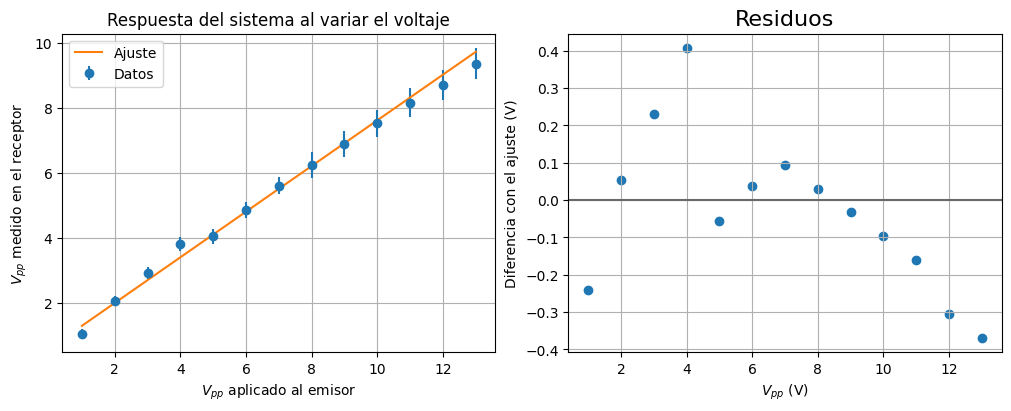

In [ ]:
#Defino la lista para el ajuste

#Funcion
def f(w, a, b):
    return a*w + b

#Ajuste
popt, pcov = curve_fit(f, vpp_gen, vpp_, sigma=err_vpp, absolute_sigma = True)

#Grafico
fig, axs = plt.subplots(1,2, figsize= (10, 4), constrained_layout=True)

axs[0].errorbar(vpp_gen,vpp_, yerr= err_vpp ,fmt='o', label='Datos')
axs[0].plot(vpp_gen,f(vpp_gen,*popt), label='Ajuste')

axs[0].set_title('Respuesta del sistema al variar el voltaje')
axs[0].set(ylabel= r'$V_{pp}$ medido en el receptor')
axs[0].set(xlabel = r'$V_{pp}$ aplicado al emisor')

axs[0].legend()
axs[0].grid()

axs[1].scatter(vpp_gen, vpp_ - np.polyval(popt, vpp_gen),)
axs[1].set(xlabel='$V_{pp}$ (V)', ylabel='Diferencia con el ajuste (V)')
axs[1].axhline(y=0, color='dimgrey')
axs[1].set_title('Residuos', fontsize=16)
axs[1].grid()

#Pendiente del ajuste
pendiente_er = [popt[0], np.sqrt(pcov[0][0])]

print(pendiente_er)


# Barrido de frecuencias

In [ ]:
#tension fija en 10V Vpp, barrido de frecuencias. Buscamos la campana de resonancia

escala_c = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]) #V
frec_c = np.array([35.0, 35.1, 35.2, 35.3, 35.4, 35.5, 35.6, 35.7, 35.8, 35.9, 36, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37, 37.1, 37.2, 37.3, 37.4, 37.5, 37.6, 37.7, 37.8, 37.9, 38.0, 38.1, 38.2, 38.3, 38.4, 38.5, 38.6, 38.7, 38.8, 38.9, 39.0, 39.1, 39.2, 39.3, 39.4, 39.5, 39.6, 39.7, 39.8, 39.9,40.0, 40.1, 40.2, 40.3, 40.4, 40.5, 40.6, 40.7, 40.8, 40.9, 41.0, 41.1, 41.2, 41.3, 41.4, 41.5, 41.6, 41.7, 41.8, 41.9, 42.0, 42.1, 42.2, 42.3, 42.4, 42.5, 42.6, 42.7, 42.8, 42.9, 43.0, 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44.0, 44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45.0]) #kHz
vpp_c= np.array([0.0014, 0.001, 0.0014, 0.0018, 0.0016, 0.0024, 0.0016, 0.002, 0.0022, 0.0026, 0.003, 0.0034, 0.0036, 0.004, 0.0042, 0.0046, 0.0044, 0.0048, 0.0052, 0.0056, 0.006, 0.0062, 0.007, 0.008, 0.009, 0.011, 0.013, 0.0158, 0.0194, 0.023, 0.027, 0.0328, 0.0384, 0.0424, 0.048, 0.0536, 0.0592, 0.0675, 0.0676, 0.0904, 0.106, 0.132, 0.164, 0.204, 0.260, 0.320, 0.384, 0.460, 0.540, 0.596, 0.680, 0.680, 0.600, 0.520, 0.440, 0.368, 0.312, 0.256, 0.224, 0.192, 0.160, 0.144, 0.127, 0.116, 0.111, 0.109, 0.104, 0.104, 0.101, 0.1, 0.1, 0.0976, 0.0952, 0.0912, 0.0832, 0.0744, 0.0672, 0.06, 0.0552, 0.0448, 0.0448, 0.0424, 0.0424, 0.0424, 0.0408, 0.0408, 0.0416, 0.042, 0.0428, 0.0452, 0.0468, 0.0476, 0.046, 0.0424, 0.038, 0.0324, 0.0292, 0.0256, 0.0228, 0.0206, 0.0188]) #V

err_vpp_c= []
for i in range(len(vpp_c)):
  err_vpp_c.append(errorvpp(vpp_c[i], escala_c[i]))

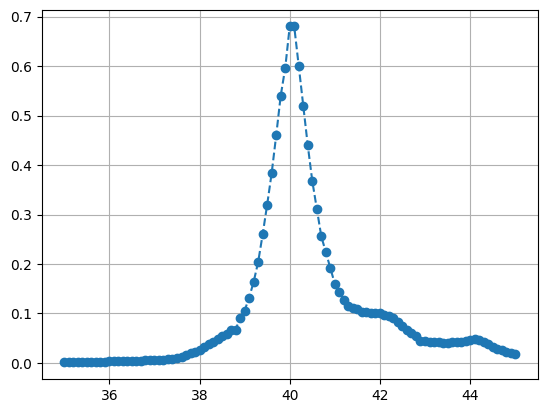

In [ ]:
#plt.errorbar(vpp_gen,vpp_, yerr= err_vpp ,fmt='o')
plt.plot(frec_c, vpp_c, linestyle='--', marker='o')
plt.grid()
plt.show()


## Ajuste con función de Lorentz

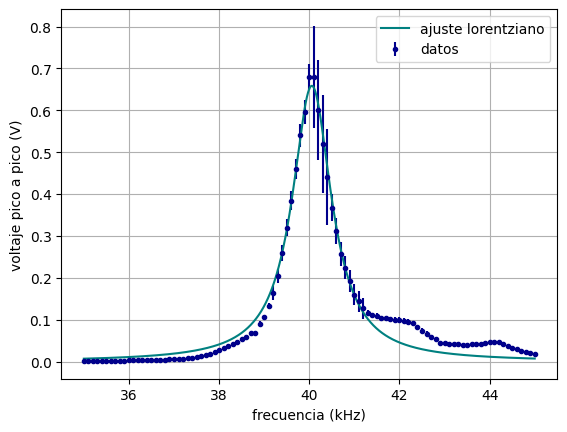

In [ ]:
#ajustamos con una lorenziana

def lorenziana(x,x0, gamma, A):
    return (A/np.pi) * (gamma / ((x-x0)**2 + gamma**2))

popt_c, pcov_c = curve_fit(lorenziana, frec_c, vpp_c, p0 = [40, 1, 1])

plt.errorbar(frec_c, vpp_c, yerr= err_vpp_c, fmt='.', color= 'darkblue', label='datos')
frec_plot = np.linspace( min( frec_c ), max( frec_c ), 10000 )
plt.plot(frec_plot,lorenziana(frec_plot,*popt_c), color= 'teal', label='ajuste lorentziano')
plt.legend(loc='best')
plt.xlabel('frecuencia (kHz)')
plt.ylabel('voltaje pico a pico (V)')

plt.grid()
plt.show()


In [ ]:
#escala_c2 = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005]) #V
escala_c2 = 0.004
frec_c2 = np.array([52.3, 52.7, 53.1, 53.5, 53.9, 54.3, 54.7, 55.1, 55.5, 55.9, 56.3, 56.7, 57.1, 57.5, 57.9, 58.3, 58.7]) #kHz
vpp_c2 = np.array([0.006, 0.006, 0.0074, 0.0124, 0.0174, 0.0172, 0.0142, 0.0162, 0.0202, 0.0146, 0.0062, 0.0026, 0.0018, 0.003, 0.0016, 0.001, 0.001]) #V

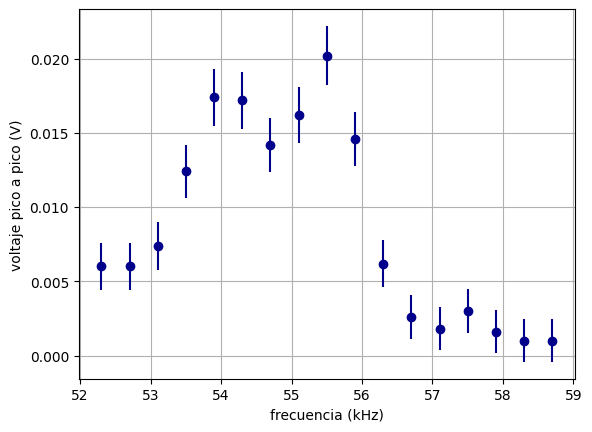

In [ ]:
err_vpp_c2= []
for i in range(len(vpp_c2)):
  err_vpp_c2.append(errorvpp(vpp_c2[i], escala_c2))

plt.errorbar(frec_c2, vpp_c2, yerr= err_vpp_c2, fmt='o', color= 'darkblue')
plt.xlabel('frecuencia (kHz)')
plt.ylabel('voltaje pico a pico (V)')
plt.grid()
plt.show()

In [ ]:
#como esta medio raro el gráfico, voy a definir una suma de lorentzianas y ver si ajusta con eso

def lorenz_sum(x, x0, gamma0, gamma1, gamma2):
  return (1/np.pi) * (gamma0 / ((x-x0)**2 + gamma0**2)) + (1/np.pi) * (gamma1 / ((x-x0)**2 + gamma1**2)) + (1/np.pi) * (gamma2 / ((x-x0)**2 + gamma2**2))

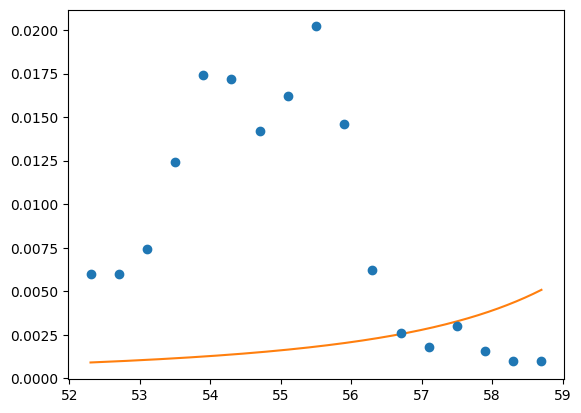

In [ ]:
#aca intente plotear el ajuste con la lorentziana pero no me esta dando

popt_c2, pcov_c2 = curve_fit(lorenz_sum, frec_c2, vpp_c2)

plt.errorbar(frec_c2, vpp_c2,fmt='o')
frec_plot2 = np.linspace( min( frec_c2 ), max( frec_c2 ), 10000 )
plt.plot(frec_plot2,lorenz_sum(frec_plot,*popt_c2))


# Señal Cuadrada

In [ ]:
#pulso cuadrado

vpp_p = [776, 272, 164, 124, 96, 79.2, 66.4, 58.4, 52, 45.6] #mV
frec_p = [40, 13.333, 8, 5.714, 4.444, 3.636, 3.077, 2.667, 2.353, 2.105] #kHz
escala_p = [200, 200, 100, 100, 100, 20, 20, 20, 20, 20] #mV
n = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [ ]:
def g(x, a, b):
    return(
        a/x + b
    )

[769.17849085   9.27457306] [4.16120953 1.44671398]


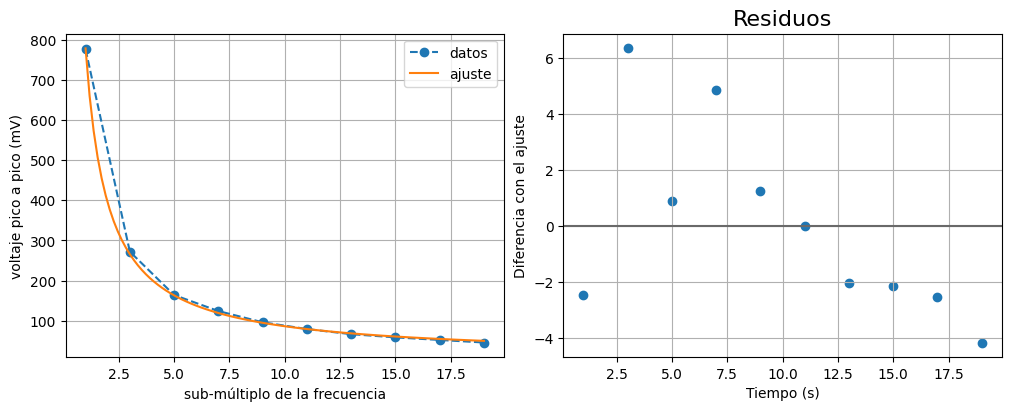

In [ ]:
#Ajuste
popt_decae, pcov_decae = curve_fit(g, n, vpp_p)

print(popt_decae, np.sqrt(np.diag(pcov_decae)))

#Plot
fig, axs = plt.subplots(1, 2, figsize=(10,4), constrained_layout=True)

axs[0].plot(n,vpp_p,'o',linestyle= '--', label='datos')
axs[0].plot(np.linspace(n[0], n[-1], 100), g(np.linspace(n[0], n[-1], 100), *popt_decae), label='ajuste')
axs[0].set_xlabel('sub-múltiplo de la frecuencia')
axs[0].set_ylabel('voltaje pico a pico (mV)')

axs[1].scatter(n, vpp_p - g(n, *popt_decae),)
axs[1].set(xlabel='Tiempo (s)', ylabel='Diferencia con el ajuste')
axs[1].axhline(y=0, color='dimgrey')
axs[1].set_title('Residuos', fontsize=16)
axs[1].grid()

axs[0].legend()
axs[0].grid()
plt.show()

# Velocidad del sonido

In [ ]:
df = pd.read_excel('Datos osciloscopio.xlsx')

## Analisis de las diferentes distancias y tiempos

### Distancia E-R 3.5cm

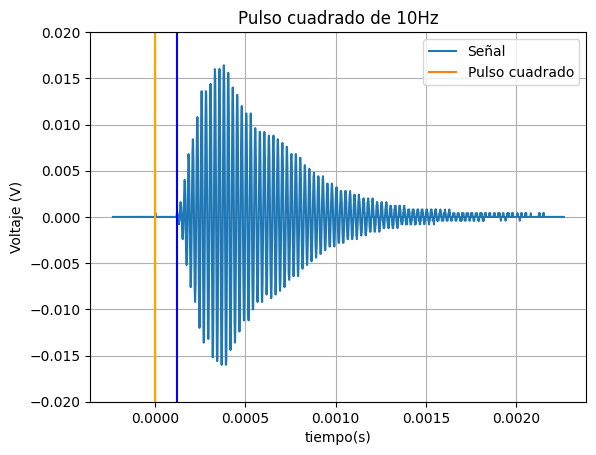

In [ ]:
#Lista de señal cuadrada con distancia 1
tiempo_0 = df['tiempo_0'] #s
energia_0 = df['energia_0'] #V
energia_c0 = df['energia_c0'] #V
escala_x0 = 2.50E-04 #s
escala_y0 = 1.00E-02 #V

#Grafico
plt.figure()

plt.plot(tiempo_0, energia_0, label='Señal')
plt.plot(tiempo_0, energia_c0, label='Pulso cuadrado')
plt.axvline(0, color='orange') #-->Entrada del pulso cuadrado
plt.axvline(0.00012, color='blue') #--> Comienzo de la señal a 10Hz

plt.title('Pulso cuadrado de 10Hz')
plt.ylim(-0.02, 0.02)
plt.xlabel('tiempo(s)')
plt.ylabel('Voltaje (V)')

plt.legend()
plt.grid()
plt.show()

delta_t0 = np.abs(0 - 0.00012) #s
delta_x0 = 3.5 #cm
delta_x0_err = 0.1 #cm


In [ ]:
dif = np.diff(energia_0)
print(dif)
t_0_index = np.where(dif>0.0004)[0][0]
print(t_0_index)
t_0 = tiempo_0[t_0_index]
print(t_0)

print(delta_t0)

c = (delta_x0/100)/t_0
print(c)

[0. 0. 0. ... 0. 0. 0.]
374
0.0001400000037
0.00012
249.99999339285733


### Distancia E-R 11cm

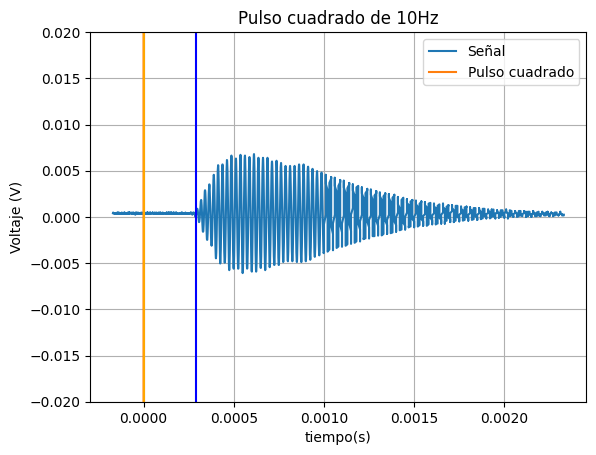

In [ ]:
#Lista de señal cuadrada con distancia 1
tiempo_1 = df['tiempo_1'] #s
energia_1 = df['energia_1'] #V
energia_c1 = df['energia_c1'] #V
escala_x1 = 2.50E-04 #s
escala_y1 = 2.00E-03 #V

#Grafico
plt.figure()

plt.plot(tiempo_1, energia_1, label='Señal')
plt.plot(tiempo_1, energia_c1, label='Pulso cuadrado')
plt.axvline(0, color='orange') #-->Entrada del pulso cuadrado
plt.axvline(0.00029, color='blue') #--> Comienzo de la señal a 10Hz

plt.title('Pulso cuadrado de 10Hz')
plt.ylim(-0.02, 0.02)
plt.xlabel('tiempo(s)')
plt.ylabel('Voltaje (V)')

plt.legend()
plt.grid()
plt.show()

delta_t1 = np.abs(0 - 0.00029)
delta_x1 = 11 #cm
delta_x1_err = delta_x0_err #cm

### Distancia E-R 18.9cm

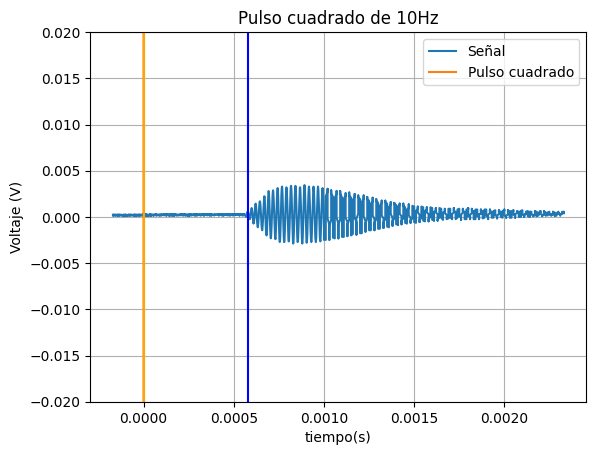

In [ ]:
#Lista de señal cuadrada con distancia 1
tiempo_2 = df['tiempo_2'] #s
energia_2 = df['energia_2'] #V
energia_c2 = df['energia_c2'] #V
escala_x2 = 2.50E-04 #s
escala_y2 = 2.00E-03 #V

#Grafico
plt.figure()

plt.plot(tiempo_2, energia_2, label='Señal')
plt.plot(tiempo_2, energia_c2, label='Pulso cuadrado')
plt.axvline(0, color='orange') #-->Entrada del pulso cuadrado
plt.axvline(0.00058, color='blue') #--> Comienzo de la señal a 10Hz

plt.title('Pulso cuadrado de 10Hz')
plt.ylim(-0.02, 0.02)
plt.xlabel('tiempo(s)')
plt.ylabel('Voltaje (V)')

plt.legend()
plt.grid()
plt.show()

delta_t2 = np.abs(0 - 0.00058)
delta_x2 = 18.9 #cm
delta_x2_err = delta_x0_err #cm

In [ ]:
#error de la señal

escalav_p = 0.002 #V
escalah_p = 0.00025 #s

err_p1= []
err_p2= []
err_p3= []



### Ajuste

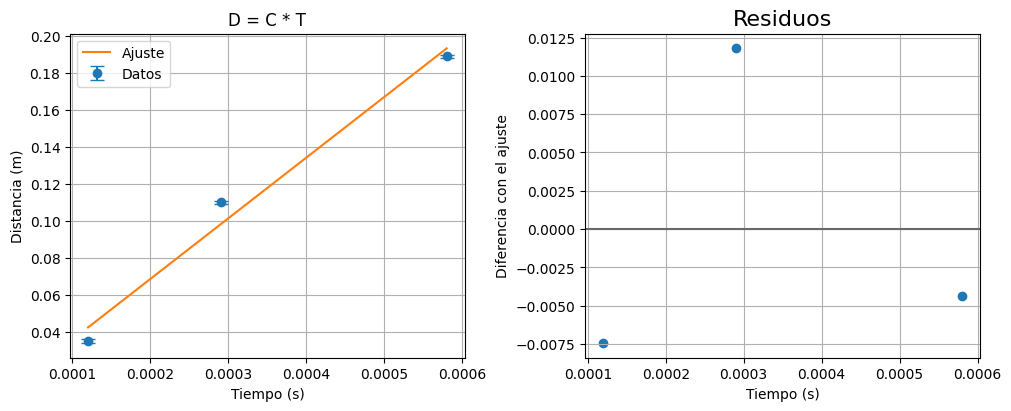

velocidad de sonido 328.0961173952917 +- 44.39514006758001 m/s


In [ ]:
#Lista de tiempos y distancias
tiempos = np.array([delta_t0, delta_t1, delta_t2]) #s
distancias = np.array([delta_x0, delta_x1, delta_x2]) / 100 #m
distancias_err = np.array([delta_x0_err, delta_x1_err, delta_x2_err]) / 100 #m

#Ajuste
popt_c, pcov_c = curve_fit(f, tiempos, distancias, sigma=distancias_err)
tiempos_a = np.linspace(tiempos[0], tiempos[-1], 100)

#Plots
fig, axs = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
axs[0].errorbar(tiempos, distancias, yerr=distancias_err, capsize=5, fmt='o', label='Datos')
axs[0].plot(tiempos_a, f(tiempos_a, *popt_c), label='Ajuste')
axs[0].set(title='D = C * T', ylabel='Distancia (m)', xlabel='Tiempo (s)')

axs[1].scatter(tiempos, distancias - np.polyval(popt_c, tiempos),)
axs[1].set(xlabel='Tiempo (s)', ylabel='Diferencia con el ajuste')
axs[1].axhline(y=0, color='dimgrey')
axs[1].set_title('Residuos', fontsize=16)
axs[1].grid()

axs[0].grid()
axs[0].legend()
plt.show()

print('velocidad de sonido', popt_c[0], '+-',np.sqrt(np.diag(pcov_c))[0], 'm/s')

# Decaimiento de la señal

## Funcion para el ajuste

In [ ]:
def exp(x, a, b, c): return (a*np.exp(b*x) + c)

## Señal 1

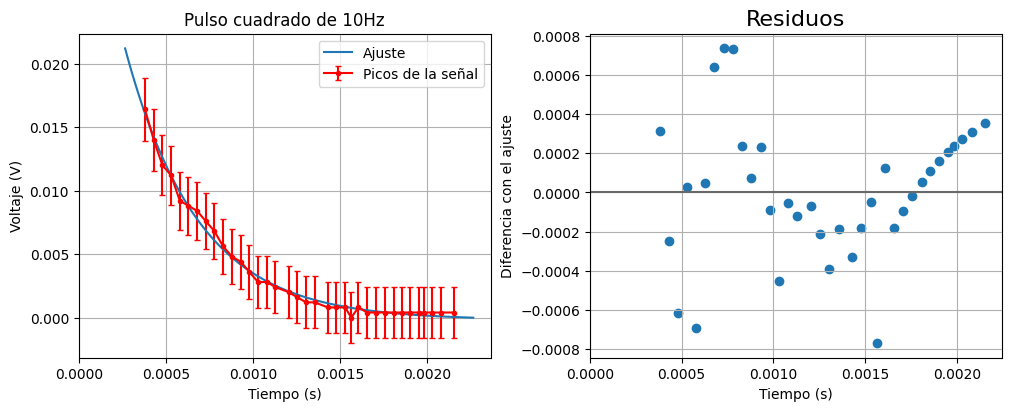

In [ ]:
#Busco los picos
picos_0, _ = find_peaks(energia_0, distance=30)
picos_0 = picos_0[6:]

tiempo_peak0 = tiempo_0[picos_0] #s
energia_peak0 = energia_0[picos_0] #V
energia_peak0_err =  errorvpp(energia_peak0, 1.00E-02) #V


#Ajuste
popt_d0, pcov_d0 = curve_fit(exp, tiempo_peak0, energia_peak0, sigma=energia_peak0_err, p0=[1, -1000, 0])
tiempos_0 = np.linspace(tiempo_0[500], tiempo_0[2499], 100)

#Grafico
fig, axs = plt.subplots(1,2, figsize=(10,4), constrained_layout = True)

# axs[0].plot(tiempo_0, energia_0, label='Señal')
axs[0].errorbar(tiempo_peak0, energia_peak0, yerr=energia_peak0_err, capsize=2,color='red', marker='.', label='Picos de la señal')
axs[0].plot(tiempos_0, exp(tiempos_0, *popt_d0), label='Ajuste')
axs[0].set(title='Pulso cuadrado de 10Hz', xlabel='Tiempo (s)', ylabel='Voltaje (V)',xticks=np.arange(0, 0.00225, step=0.0005))

axs[1].scatter(tiempo_peak0, energia_peak0 - exp(tiempo_peak0, *popt_d0))
axs[1].set(xlabel='Tiempo (s)', ylabel='Diferencia con el ajuste', xticks=np.arange(0, 0.00225, step=0.0005))
axs[1].axhline(y=0, color='dimgrey')
axs[1].set_title('Residuos', fontsize=16)


axs[0].legend()
axs[0].grid()
axs[1].grid()
plt.show()

## Señal 2

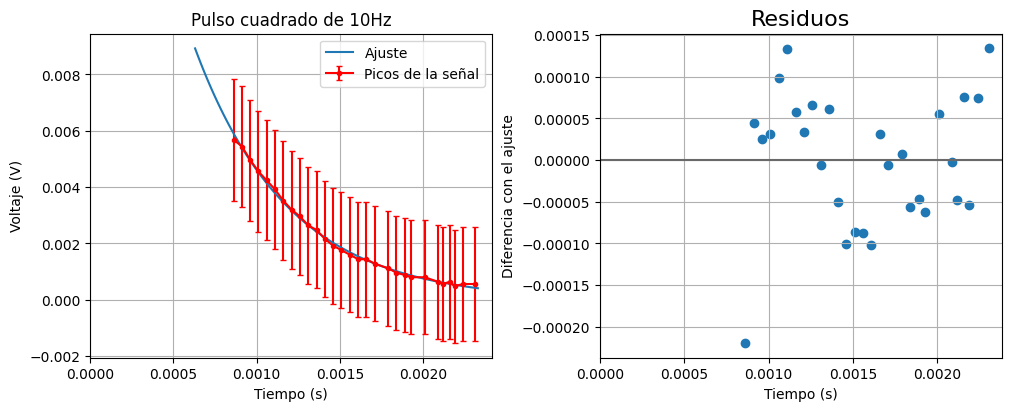

In [ ]:
#Busco los picos
picos_1, _ = find_peaks(energia_1, distance=30)
picos_1 = list(picos_1[21:])
picos_1.remove(2218)
picos_1.remove(1919)

tiempo_peak1 = tiempo_1[picos_1] #s
energia_peak1 = energia_1[picos_1] #V

energia_peak1_err =  errorvpp(energia_peak1, 1.00E-02) #V


#Ajuste
popt_d1, pcov_d1 = curve_fit(exp, tiempo_peak1, energia_peak1, sigma=energia_peak1_err, p0=[3, -2.38239378e+03, 0])
tiempos_1 = np.linspace(tiempo_1[800], tiempo_1[2499], 100)

#Grafico
fig, axs = plt.subplots(1,2, figsize=(10,4), constrained_layout = True)

# axs[0].plot(tiempo_1, energia_1, label='Señal')
axs[0].errorbar(tiempo_peak1, energia_peak1, yerr=energia_peak1_err, capsize=2,color='red', marker='.', label='Picos de la señal')
axs[0].plot(tiempos_1, exp(tiempos_1, *popt_d1), label='Ajuste')
axs[0].set(title='Pulso cuadrado de 10Hz', xlabel='Tiempo (s)', ylabel='Voltaje (V)',xticks=np.arange(0, 0.00225, step=0.0005))

axs[1].scatter(tiempo_peak1, energia_peak1 - exp(tiempo_peak1, *popt_d1))
axs[1].set(xlabel='Tiempo (s)', ylabel='Diferencia con el ajuste', xticks=np.arange(0, 0.00225, step=0.0005))
axs[1].axhline(y=0, color='dimgrey')
axs[1].set_title('Residuos', fontsize=16)


axs[0].legend()
axs[0].grid()
axs[1].grid()
plt.show()

## Señal 3

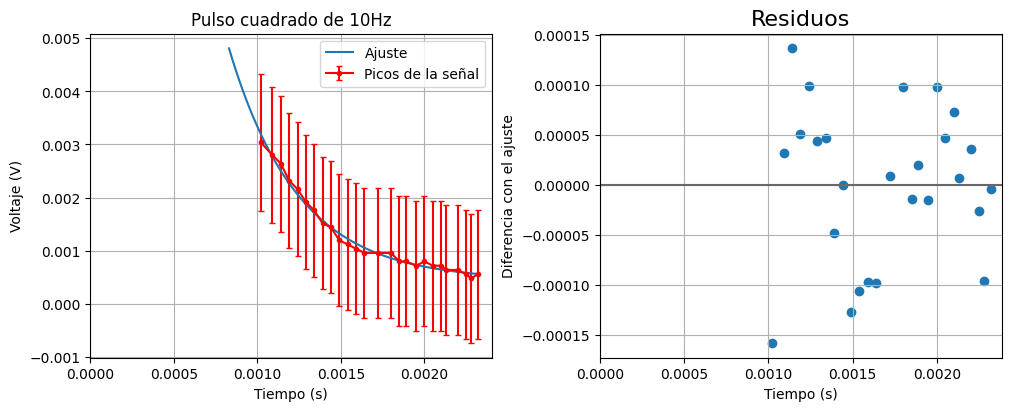

In [ ]:
#Busco los picos
picos_2, _ = find_peaks(energia_2, distance=30)
picos_2 = list(picos_2[27:])
picos_2.remove(1928)
picos_2.remove(1851)

tiempo_peak2 = tiempo_2[picos_2] #s
energia_peak2 = energia_2[picos_2] #V
energia_peak2_err =  errorvpp(energia_peak2, 2.00E-03) #V


#Ajuste
popt_d2, pcov_d2 = curve_fit(exp, tiempo_peak2 ,energia_peak2, sigma=energia_peak2_err, p0=[1, -1000, 0])
tiempos_2 = np.linspace(tiempo_2[1000], tiempo_2[2499], 100)

#Grafico
fig, axs = plt.subplots(1,2, figsize=(10,4), constrained_layout = True)

# axs[0].plot(tiempo_2, energia_2, label='Señal')
axs[0].errorbar(tiempo_peak2, energia_peak2, yerr=energia_peak2_err, capsize=2,color='red', marker='.', label='Picos de la señal')
axs[0].plot(tiempos_2, exp(tiempos_2, *popt_d2), label='Ajuste')
axs[0].set(title='Pulso cuadrado de 10Hz', xlabel='Tiempo (s)', ylabel='Voltaje (V)',xticks=np.arange(0, 0.00225, step=0.0005))

axs[1].scatter(tiempo_peak2, energia_peak2 - exp(tiempo_peak2, *popt_d2))
axs[1].set(xlabel='Tiempo (s)', ylabel='Diferencia con el ajuste', xticks=np.arange(0, 0.00225, step=0.0005))
axs[1].axhline(y=0, color='dimgrey')
axs[1].set_title('Residuos', fontsize=16)


axs[0].legend()
axs[0].grid()
axs[1].grid()
plt.show()

## Resultados del decaimiento

In [ ]:
exp_decae0 = [popt_d0[1], np.sqrt(np.diag(pcov_d0))[1]]
exp_decae1 = [popt_d1[1], np.sqrt(np.diag(pcov_d1))[1]]
exp_decae2 = [popt_d2[1], np.sqrt(np.diag(pcov_d2))[1]]

In [ ]:
print(
    exp_decae0,
    exp_decae1,
    exp_decae2,
)

[-2396.248073862051, 85.16600143789029] [-1778.0661029814014, 57.956432353709886] [-2424.7429663202074, 149.76686654854393]
